In [3]:
!pip install xgboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   - -------------------------------------- 1.6/56.8 MB 10.7 MB/s eta 0:00:06
   -- ------------------------------------- 3.9/56.8 MB 10.9 MB/s eta 0:00:05
   ---- ----------------------------------- 6.0/56.8 MB 10.7 MB/s eta 0:00:05
   ----- ---------------------------------- 7.9/56.8 MB 10.1 MB/s eta 0:00:05
   ------- -------------------------------- 10.0/56.8 MB 10.1 MB/s eta 0:00:05
   -------- ------------------------------- 12.6/56.8 MB 10.4 MB/s eta 0:00:05
   ---------- ----------------------------- 14.7/56.8 MB 10.4 MB/s eta 0:00:05
   ----------- ---------------------------- 16.8/56.8 MB 10.4 MB/s eta 0:00:04
   ------------- -------------------------- 18.9/56.8 MB 10.5 MB/s eta 0:00:04
   -------------- ------------------------- 21.2/56.8 MB 10.5 MB/s eta 0:00:04
   ---------------- ----------------------- 23.6/56.8 MB 10.5 MB/s eta 0:00:04
   ------------------ --------------------- 26.0/56.8 MB 10.6 MB/

In [4]:
df = pd.read_csv(r"D:\rockfall\rockfall_timeseries_flat.csv")
# Features (drop non-numeric + label + sequence_id)
X = df.drop(columns=["failure_label", "sequence_id"], errors="ignore")
y = df["failure_label"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

# XGBOOST

In [6]:
model = xgb.XGBClassifier(
    n_estimators=200,       
    learning_rate=0.1,        
    max_depth=5,             
    subsample=0.8,            
    colsample_bytree=0.8,    
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"    
)

In [8]:
model.fit(X_train, y_train)



C:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:04:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [9]:

y_pred = model.predict(X_test)

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6160
           1       1.00      1.00      1.00      3840

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



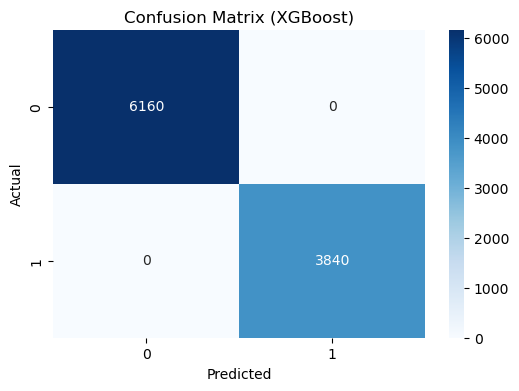

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (XGBoost)")
plt.show()

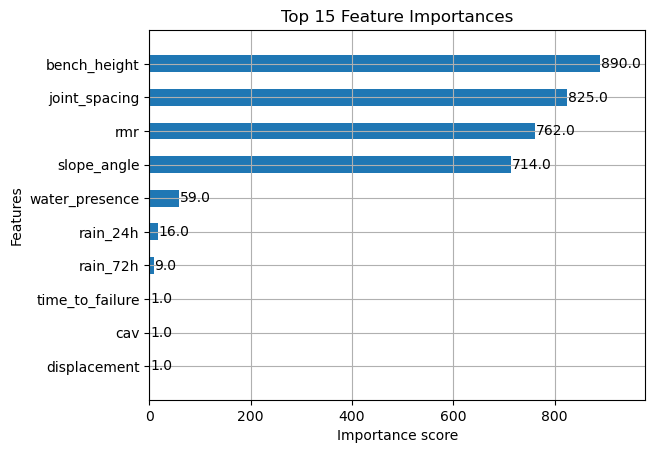

In [12]:
xgb.plot_importance(model, importance_type="weight", max_num_features=15, height=0.5)
plt.title("Top 15 Feature Importances")
plt.show()